In [1]:
from config import meteo_key
import requests
import json
from pprint import pprint
from datetime import date
import pandas as pd
import numpy as np
import csv
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [2]:
stations = [72295, 72202, 72530, 72434, 72509, 72537, 72407, 74486, 72408, 72259]

start = "2020-01"
end = "2020-02"

url = "https://api.meteostat.net/v1/history/monthly?"
city = []

for station in stations:
    query_url = f"{url}station={station}&start={start}&end={end}&key={meteo_key}"
 
    try:
        # Store the response
        response = requests.get(query_url).json()
        
        # Create a dictionary of desired response data
        response_dict = {
            'Station': station,
            'January Temp': response['data'][0]['temperature_mean'],
            'February Temp': response['data'][1]['temperature_mean']}

        print(response_dict)
        # Add the response dictionary to the list of responses
        city.append(response_dict)
    except:
        print(f'API call failed for station {station}. Skipping...')


city_df = pd.DataFrame(city)

city_df

{'Station': 72295, 'January Temp': 15.3, 'February Temp': 16.1}
{'Station': 72202, 'January Temp': 21.9, 'February Temp': 22.8}
{'Station': 72530, 'January Temp': -1, 'February Temp': -0.9}
{'Station': 72434, 'January Temp': 2.1, 'February Temp': 2.9}
{'Station': 72509, 'January Temp': 3.4, 'February Temp': 3.2}
{'Station': 72537, 'January Temp': 0.3, 'February Temp': -1}
{'Station': 72407, 'January Temp': 4.3, 'February Temp': 5.5}
{'Station': 74486, 'January Temp': 3.8, 'February Temp': 4.1}
{'Station': 72408, 'January Temp': 3.8, 'February Temp': None}
{'Station': 72259, 'January Temp': 10.1, 'February Temp': 9.8}


,Station,January Temp,February Temp
0,72295,15.3,16.1
1,72202,21.9,22.8
2,72530,-1.0,-0.9
3,72434,2.1,2.9
4,72509,3.4,3.2
5,72537,0.3,-1.0
6,72407,4.3,5.5
7,74486,3.8,4.1
8,72408,3.8,NaN
9,72259,10.1,9.8


In [3]:
city_replace = city_df.replace({"Station" : {72295:"California", 
                                             72202: "Florida", 
                                             72530: "Illinois", 
                                             72434: "Louisana", 
                                             72509: "Massachusetts", 
                                             72537: "Michigan", 
                                             72407: "New Jersey", 
                                             74486: "New York", 
                                             72408: "Pennsylvania", 
                                             72259: "Texas"}})

city_replace.sort_values(by=["Station"], inplace=True)

city_replace.columns = ["Province_State", "January Temp","February Temp"]
city_replace_df = city_replace.set_index('Province_State')
city_replace_df['February Temp'] = city_replace_df['February Temp'].fillna(4.75)

city_replace_df

,January Temp,February Temp
Province_State,,
California,15.3,16.10
Florida,21.9,22.80
Illinois,-1.0,-0.90
Louisana,2.1,2.90
Massachusetts,3.4,3.20
Michigan,0.3,-1.00
New Jersey,4.3,5.50
New York,3.8,4.10
Pennsylvania,3.8,4.75


In [4]:
states = ["California", "Florida", "Illinois", "Louisiana", "Massachusetts",
         "Michigan", "New Jersey", "New York", "Pennsylvania", "Texas"]


In [5]:
time_series = pd.read_csv('../Resources/time_series_covid19_confirmed_us.csv')
time_series_df = pd.DataFrame(time_series)
time_series_group = time_series_df.groupby('Province_State').sum()
# Remove un-needed columns
del time_series_group['UID']
del time_series_group['code3']
del time_series_group['FIPS']
del time_series_group['Lat']
del time_series_group['Long_']

filter_df  = time_series_group[time_series_group.index.isin(states)]
filter_df


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
Province_State,,,,,,,,,,,,,,,,,,,,,
California,0,0,0,0,2,2,2,2,2,3,...,18897,19710,21081,21706,22795,23931,25356,26686,27677,29157
Florida,0,0,0,0,0,0,0,0,0,0,...,15456,16364,17531,18494,19895,21019,21628,22511,23343,24759
Illinois,0,0,1,1,1,1,1,1,1,2,...,15078,15079,17887,19180,20852,22025,23248,24593,25734,27578
Louisiana,0,0,0,0,0,0,0,0,0,0,...,17030,18283,19253,20014,20595,21016,21518,21951,22532,23118
Massachusetts,0,0,0,0,0,0,0,0,0,0,...,16790,18941,20974,22860,25475,26867,28164,29918,32181,34402
Michigan,0,0,0,0,0,0,0,0,0,0,...,20346,21504,22434,23605,24244,25635,27001,28059,28809,30023
New Jersey,0,0,0,0,0,0,0,0,0,0,...,47437,51027,54588,58151,61850,64584,68824,71030,75317,78467
New York,0,0,0,0,0,0,0,0,0,0,...,151061,161779,172348,181026,189033,195749,203020,214454,223691,230597
Pennsylvania,0,0,0,0,0,0,0,0,0,0,...,16631,18300,20051,21719,22938,24292,25465,26753,28258,29888


In [6]:
jan_only = filter_df[filter_df.columns[0:10]]
jan_temp = pd.DataFrame(jan_only)
pivot_jan = jan_temp.T

sum_jan= pivot_jan.sum()
new_jan= pd.DataFrame(sum_jan)
new_jan.columns = ["Sum Jan Cases"]
new_jan

,Sum Jan Cases
Province_State,
California,13
Florida,0
Illinois,9
Louisiana,0
Massachusetts,0
Michigan,0
New Jersey,0
New York,0
Pennsylvania,0


In [7]:

feb_only = filter_df[filter_df.columns[11:29]]
feb_temp = pd.DataFrame(feb_only)
pivot_feb = feb_temp.T
sum_feb = pivot_feb.sum()
new_feb = pd.DataFrame(sum_feb)
new_jan["Sum Feb Cases"] = new_feb

new_jan

,Sum Jan Cases,Sum Feb Cases
Province_State,,
California,13,121
Florida,0,0
Illinois,9,36
Louisiana,0,0
Massachusetts,0,18
Michigan,0,0
New Jersey,0,0
New York,0,0
Pennsylvania,0,0


In [8]:
df_cd = city_replace_df.join(new_jan)
df_cd['Sum Jan Cases'] = df_cd['Sum Jan Cases'].fillna(0.0)
df_cd['Sum Feb Cases'] = df_cd['Sum Feb Cases'].fillna(0.0)

df_cd

,January Temp,February Temp,Sum Jan Cases,Sum Feb Cases
Province_State,,,,
California,15.3,16.10,13.0,121.0
Florida,21.9,22.80,0.0,0.0
Illinois,-1.0,-0.90,9.0,36.0
Louisana,2.1,2.90,0.0,0.0
Massachusetts,3.4,3.20,0.0,18.0
Michigan,0.3,-1.00,0.0,0.0
New Jersey,4.3,5.50,0.0,0.0
New York,3.8,4.10,0.0,0.0
Pennsylvania,3.8,4.75,0.0,0.0


The correlation between both factors is 0.16


Text(0.5, 1.0, 'January Temperature vs # of Cases')

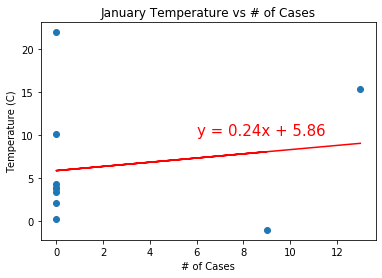

In [9]:
x_values = df_cd['Sum Jan Cases']
y_values = df_cd['January Temp']
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('# of Cases')
plt.ylabel('Temperature (C)')
plt.title("January Temperature vs # of Cases")

plt.savefig(f"../output_data/jantempcases.png")

The correlation between both factors is 0.31


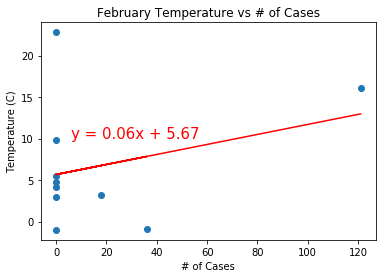

In [10]:
x_values = df_cd['Sum Feb Cases']
y_values = df_cd['February Temp']
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('# of Cases')
plt.ylabel('Temperature (C)')
plt.title("February Temperature vs # of Cases")
plt.savefig(f"../output_data/febtempcases.png")